# Data extraction, imputation, scaling, visualizing feature distribution

## Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')

## 1. Feature extraction

DictVectorizer

In [2]:
data = [{'age': 4, 'height': 96.0},
 {'age': 1, 'height': 73.9},
 {'age': 3, 'height': 88.9},
 {'age': 2, 'height': 81.6}]

In [3]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
data_transformed


array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [5]:
# setting `sparse=True` in this snippet

dv2 = DictVectorizer(sparse=True)
data_transformed_2 = dv.fit_transform(data)
data_transformed_2

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

## Data Imputation

In [5]:
from sklearn.impute import SimpleImputer

### Data imputation on a real world dataset

In [6]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None, names=cols)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


#### Step 1: Check if the dataset contains missing values

In [7]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Let's check if there are any missing values in numerical columns - here we have checked it for all columns in the dataframe.

In [8]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

There are two non-numerical features: ca and thal.
> List their unique values

In [9]:
print('Unique values in ca:', heart_data.ca.unique())
print('Unique values in thal:', heart_data.thal.unique())


Unique values in ca: ['0.0' '3.0' '2.0' '1.0' '?']
Unique values in thal: ['6.0' '3.0' '7.0' '?']


Both of them contain ?, which denotes missing values. Let's count the number of missing values.

In [10]:
print('# missing values in ca:',
      heart_data.loc[heart_data.ca == '?', 'ca'].count())
print('# missing values in thal:',
      heart_data.loc[heart_data.thal == '?', 'thal'].count())

# missing values in ca: 4
# missing values in thal: 2


#### Step 2: Replace '?' with nan.

In [11]:
heart_data.replace('?', np.nan, inplace=True)

#### Step 3: Fill the missing values with sklearn missing value imputation utilities.
> Here we use SimpleImputer with mean strategy

We will try two variations:  
> add_indicator = False: Default choice that only imputes missing values.

In [12]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)

(303, 14)


> add_indicator = True: Adds additional column for each column containing missing values in our case, this adds two columns one for ca and other for thal. It indicates if the sample has a missing value.

In [13]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean', add_indicator=True)
imputer = imputer.fit(heart_data)
heart_data_imputed_with_indicator = imputer.transform(heart_data)
print(heart_data_imputed_with_indicator.shape)

(303, 16)


## 3. Feature scaling

Feature scaling transform feature values such that all the features are on the same scale.

In [14]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
abalone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data', header=None, names=cols)
abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### Step 1: Examine the dataset

Feature scaling is performed only on numerical attributes. Let's check which are the numerical attributes in this dataset. We can get this via the info() method.

In [15]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#### Step 1a (optional): Convert non-numerical attributes to numerical ones. 

In [16]:
abalone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [17]:
# Assign numerical value to sex.
abalone_data = abalone_data.replace({"Sex": {"M":1, "F":2, "I":3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


#### Step 2: Separate labels from features.

In [18]:
y = abalone_data.pop("Rings")
print("The DataFrame object after deleting the column")
abalone_data.info()

The DataFrame object after deleting the column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


#### Step 3: Examine feature scales.  
Two methods:  
  > Statistical method  
  > Visualizations

#### Statistical method

In [19]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


#### Visualization of feature distributions  

> Histogram  
> Kernel density estimation (KDE) plot  
> Box plot  
> Violin plot  


#### Histogram plot
Each feature can be plotted on a separate histogram or can be combined into a single plot.

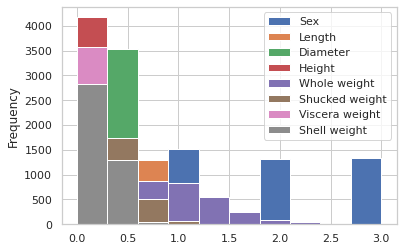

In [20]:
abalone_data.plot.hist()
# plt.legend(in_cols, fontsize=18, loc="upper_right", frameon=True)
# plt.title('Distribution of features across samples', fontsize=18)
# plt.xlabel('Range', fontsize=16)
# plt.ylabel('Frequency', fontsize=16)

# plt.show()

#### KDE plot

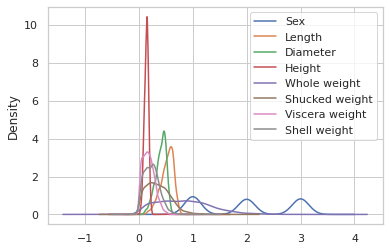

In [21]:
# Title [KDE plots - combined]
ax = abalone_data.plot.kde()

#### Box plot

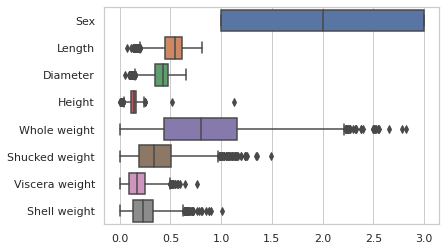

In [22]:
# abalone_data.plot.box()
bx = sns.boxplot(data=abalone_data, orient='h')

#### Violin plot

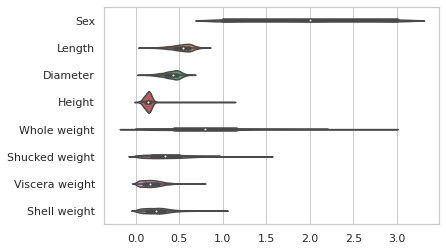

In [23]:
vx = sns.violinplot(data=abalone_data, orient='h')

**#### Step 4: Scaling**


#### Normalization  

The features are normalized such that their range lies between [0, 1] or [-1, 1]. There are two ways to achieve this.  
> `MaxAbsoluteScaler` transforms features in range [-1, 1]  
> `MinMaxScaler` transforms features in range [0, 1]  

**MaxAbsoluteScaler**


In [24]:
x = np.array([4, 2, 5, -2, -100]).reshape(-1,1)
print(x)

[[   4]
 [   2]
 [   5]
 [  -2]
 [-100]]


In [25]:
from sklearn.preprocessing import MaxAbsScaler

mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
print(x_new)

[[ 0.04]
 [ 0.02]
 [ 0.05]
 [-0.02]
 [-1.  ]]


**MinMaxScaler**

In [26]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X = abalone_data
X_normalized = mms.fit_transform(X)
X_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

Let's look at the mean and standard deviation of each feature

In [27]:
X_normalized.mean(axis=0)

array([0.47773522, 0.60674608, 0.59307774, 0.12346584, 0.29280756,
       0.24100033, 0.23712127, 0.2365031 ])

In [28]:
X_normalized.std(axis=0)

array([0.4138578 , 0.16226829, 0.16676972, 0.03701066, 0.17366046,
       0.14925109, 0.14430695, 0.13870055])

#### Histogram of transformed features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


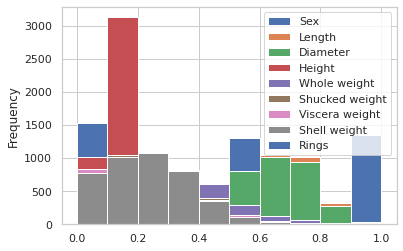

In [29]:
X_transformed = pd.DataFrame(X_normalized)
X_transformed.plot.hist()
plt.legend(cols, loc="upper_right", frameon=True)

#### KDE plot of transformed features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


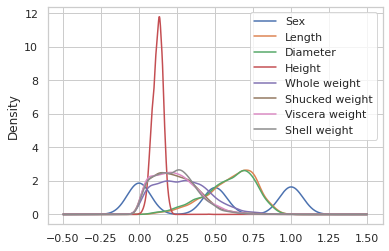

In [30]:
kx = X_transformed.plot.kde()
plt.legend(cols, loc="upper_right", frameon=True)

#### Box plot of transformed features

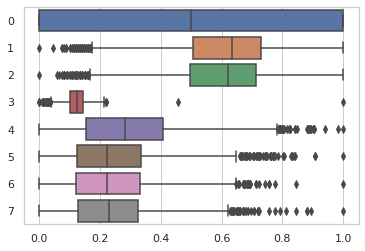

In [31]:
bx = sns.boxplot(data=X_transformed, orient='h')


#### Violin plot of transformed features

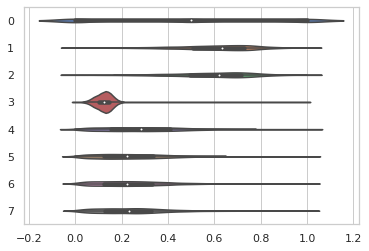

In [32]:
vx = sns.violinplot(data=X_transformed, orient='h')


## Standardization  

Standardization is another feature scaling technique that results into (close to) zero mean and unit standard deviation of features' values. 

In [33]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_standardized = ss.fit_transform(X)
X_standardized[:5]

array([[-1.15434629, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
        -0.4634999 , -0.35668983, -0.20713907],
       [-1.15434629, -0.69947638, -0.43214879, -0.34709919, -0.63781934,
        -0.64823753, -0.60759966, -0.60229374],
       [ 1.26194258, -1.61554351, -1.54070702, -1.42308663, -1.27208566,
        -1.2159678 , -1.28733718, -1.32075677]])

In [34]:
X_standardized.mean(axis=0)

array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        9.18585294e-17, -1.02065033e-17,  2.70472337e-16,  2.97689679e-16])

In [35]:
X_standardized.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

The means of different features are now comparable with SD = 1

#### Histogram of standardized features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


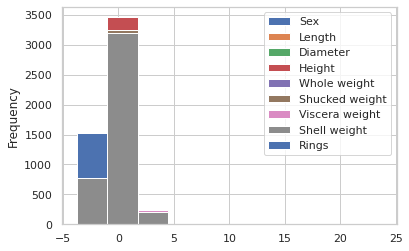

In [36]:
X_std_transformed = pd.DataFrame(X_standardized)
X_std_transformed.plot.hist()
plt.legend(cols, loc="upper_right", frameon=True)

#### KDE plot of standardized features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Unrecognized location 'upper_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


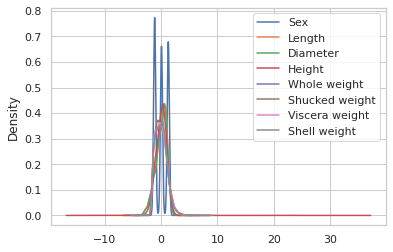

In [37]:
kx = X_std_transformed.plot.kde()
plt.legend(cols, loc="upper_right", frameon=True)


#### Box plot of standardized features


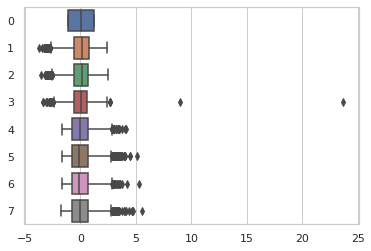

In [38]:
bx = sns.boxplot(data=X_std_transformed, orient='h')


#### Violin plot of standardized features

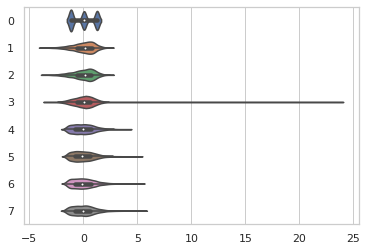

In [39]:
vx = sns.violinplot(data=X_std_transformed, orient='h')

# Demonstration of Data transformation, Composite transformers (lec 2.10)

## 4. add_dummy_feature  

Augments dataset witha a column vector, each value in the column vector is 1. This is useful for adding a parameter for bias term in the model.

In [40]:
x = np.array(
    [[7,1],
     [1,8],
     [2,0],
     [9,6]])

from sklearn.preprocessing import add_dummy_feature

x_new = add_dummy_feature(x)
print(x_new)

[[1. 7. 1.]
 [1. 1. 8.]
 [1. 2. 0.]
 [1. 9. 6.]]


## 5. Custom transformers

In [41]:
from sklearn.preprocessing import FunctionTransformer

In [42]:
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Let's use np.log1p which returns natural logarithm of (1 + the feature value

In [43]:
transformer = FunctionTransformer(np.log1p, validate=True)
wine_data_transformed = transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformed, columns=wine_data.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


## Polynomial Features

Generate new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree.

In [44]:
from sklearn.preprocessing import PolynomialFeatures

wine_data_copy = wine_data.copy()
# wine_data = wine_data.drop(['quality'], axis=1)
print('Number of features before transformation = ', wine_data.shape)

# Let us fit a polynomial of degree 2 to wine_data
poly = PolynomialFeatures(degree=2)
poly_wine_data = poly.fit_transform(wine_data)
print("Number of features after transformation = ", poly_wine_data.shape)

Number of features before transformation =  (1599, 12)
Number of features after transformation =  (1599, 91)


Note that after the polynomial transformation, we have 78 features. Let's list out these features:

In [45]:
poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'fixed acidity quality',
       'volatile acidity^2', 'volatile acidity citric acid',
       'volatile acidity residual sugar', 'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'volatile acidity quality', 'citric acid^2',
       'c

## 7. Discretization  

Otherwise known as **quantization** or **binning**

In [46]:
# kBinsDiscretizer discretizes features into k-bins  
from sklearn.preprocessing import KBinsDiscretizer

Let us demonstrate `KBinsDiscretizer` using wine quality dataset.

In [47]:
wine_data = wine_data_copy.copy()

# transfrom the dataset with KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=10, encode='onehot')
X = np.array(wine_data['chlorides']).reshape(-1,1)
X_binned = enc.fit_transform(X)
X_binned

<1599x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

In [48]:
# Since output is sparse, use to_array() to expand it.
X_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

## **8. Handling Categorical Features**  

We need to convert the categorical features into numeric features.  
1. Ordinal encoding
2. One-hot encoding
3. Label encoder
4. Using dummy variables

### **Ordinal Encoding**  

Has some drawbacks

### **One-hot Encoding**  

In [49]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [50]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, names=cols)
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
iris_data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [52]:
iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [53]:
onehotencoder = OneHotEncoder(categories='auto')
print('Shape of y before encoding', iris_data.label.shape)

'''
Passing 1d arrays as data to onehotencoder is deprecated in version ,
hence reshape to (-1, 1) to have 2 dimensions.
Input of onehotencoder fit_transform must not be a 1-rank array
'''

iris_labels = onehotencoder.fit_transform(iris_data.label.values.reshape(-1, 1))

print('Shape of y after encoding', iris_labels.shape)

# since output is sparse, use toarray() to expand it.
print('First 5 labels:')
print(iris_labels.toarray()[:5])

Shape of y before encoding (150,)
Shape of y after encoding (150, 3)
First 5 labels:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


Let us observe the difference between one hot encoding and ordingal encoding.

In [54]:
enc = OrdinalEncoder()
iris_labels = np.array(iris_data['label'])

iris_labels_transformed = enc.fit_transform(iris_labels.reshape(-1,1))
print("Unique labels:", np.unique(iris_labels_transformed))

print("\nFirst 5 labels:")
print(iris_labels_transformed[:5])

Unique labels: [0. 1. 2.]

First 5 labels:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


## Label Encoder  

Another option is to use LabelEncoder for transforming categorical features into integer codes.  

In [55]:
from sklearn.preprocessing import LabelEncoder

# get the class column in a new variable
iris_labels = np.array(iris_data['label'])
                       
# encode the class names to integers
enc = LabelEncoder()
label_integer = enc.fit_transform(iris_labels)
label_integer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## MultilabelBinarizer  
Encodes categorical features with value between 0 and k-1, where k is the number of classes.

In [56]:
movie_genres = [{'action', 'comedy'},
                {'comedy'},
                {'action', 'thriller'},
                {'science-fiction', 'action', 'thriller'}]
                

In [57]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(movie_genres)


array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

## Using dummy variables


In [58]:
# use get dummies to create a one-hot encoding for each unique categorical value in the 'class' column
# convert categorical class variable to one-hot encoding:
iris_data_onehot = pd.get_dummies(iris_data, columns=['label'], prefix='one-hot')
iris_data_onehot

,sepal length,sepal width,petal length,petal width,one-hot_Iris-setosa,one-hot_Iris-versicolor,one-hot_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


## 9. Composite Transformers

### ColumnTransformer  

It applies a set of transformers to columns of an array of pandas.DataFrame, concatenates the transformed outputs from different transformers into a single matrix.  
> It is useful for transforming heterogenous data by applying different transformers to separate subsets of features.  
> It combines different feature selection mechanisms and transformation into a single transformer object.  

In [59]:
x = [
     ['20.0', 'male',],
     ['11.2', 'female',],
     ['15.6', 'female',],
     ['13.0', 'male',],
     ['18.6', 'male',],
     ['16.4', 'female',],
]
x = np.array(x)

In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder

ct = ColumnTransformer([('scaler', MaxAbsScaler(), [0]),
                        ('pass', 'passthrough', [0]),
                        ('encoder', OneHotEncoder(), [1])])
ct.fit_transform(x)

array([['1.0', '20.0', '0.0', '1.0'],
       ['0.5599999999999999', '11.2', '1.0', '0.0'],
       ['0.78', '15.6', '1.0', '0.0'],
       ['0.65', '13.0', '0.0', '1.0'],
       ['0.93', '18.6', '0.0', '1.0'],
       ['0.82', '16.4', '1.0', '0.0']], dtype='<U32')

## TransformedTargetRegressor  

Transforms the target variable y before fitting a regression model.  
> The predicted values are mapped back to the original space via an inverse transform.  
> It takes regressor and transformer to be applied to the target variable arguments.  

In [61]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True)
X, y = X[:2000, :], y[:2000]    # select a subset of data

transformer = MaxAbsScaler()

# Two regressor - one based on the original label.
regressor = LinearRegression()

# second regressor with transformed labels.
regr = TransformedTargetRegressor(regressor=regressor, transformer=transformer)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
regr.fit(X_train, y_train)
print("R2 score of raw label regression: {0:.2f}".format(
    regr.score(X_test, y_test)))

raw_target_regr = LinearRegression().fit(X_train, y_train)
print("R2 score of transformed label regression: {0:.2f}".format(
    raw_target_regr.score(X_test, y_test)))


R2 score of raw label regression: 0.59
R2 score of transformed label regression: 0.59


## 10. Feature Selection